In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

df=pd.read_csv("cleandata.csv")

<Figure size 1200x600 with 0 Axes>

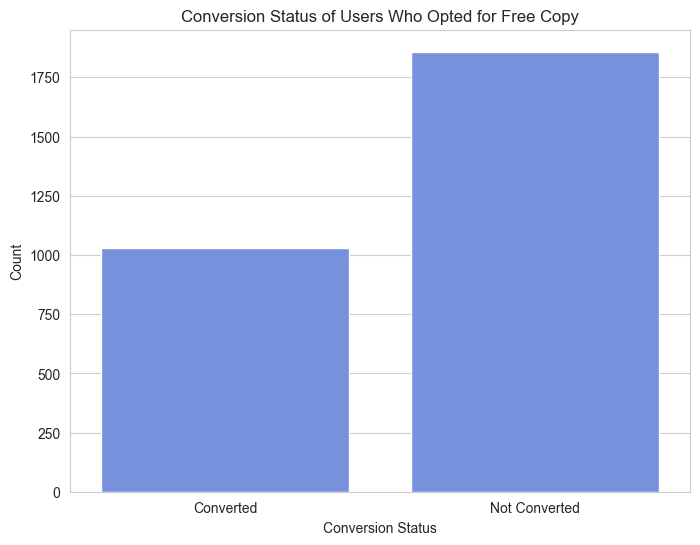

In [8]:
#hypothesis : If we give a free copy of the master class, the conversion rate will increase
plt.figure(figsize=(12, 6))

free_copy_users=df[df["A free copy of Mastering The Interview"]==1]

conversion_counts = free_copy_users["Converted"].value_counts()

# Prepare data for visualization
conversion_data = {
    "Conversion Status": ["Converted", "Not Converted"],
    "Count": [conversion_counts.get(1), conversion_counts.get(0)]
}

# Create a DataFrame for plotting
conversion_df = pd.DataFrame(conversion_data)

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x="Conversion Status", y="Count", data=conversion_df)
plt.title("Conversion Status of Users Who Opted for Free Copy")
plt.ylabel("Count")
plt.xlabel("Conversion Status")
plt.show()

<Figure size 1200x600 with 0 Axes>

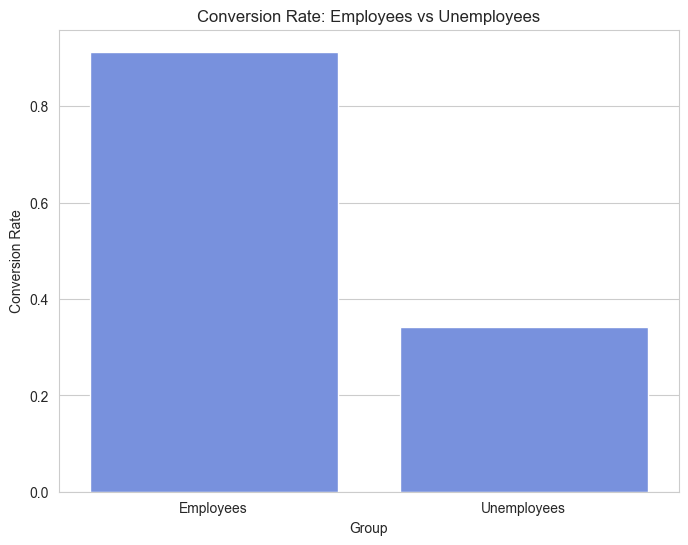

In [ ]:
# hypothesis 2: employees(workingprofessional ,business man) have higher conversion rate
plt.figure(figsize=(12, 6))
employee_conversion = df[df["What is your current occupation"].isin(["Working Professional", "Businessman"])]
unemployee_conversion = df[~df["What is your current occupation"].isin(["Working Professional", "Businessman"])]

employee_conversion_rate = employee_conversion["Converted"].mean()
unemployee_conversion_rate = unemployee_conversion["Converted"].mean()

conversion_data = {
    "Group": ["Employees", "Unemployees"],
    "Conversion Rate": [employee_conversion_rate, unemployee_conversion_rate]
}

conversion_df = pd.DataFrame(conversion_data)

plt.figure(figsize=(8, 6))
sns.barplot(x="Group", y="Conversion Rate", data=conversion_df)
plt.title("Conversion Rate: Employees vs Unemployees")
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.show()

<Figure size 1200x600 with 0 Axes>

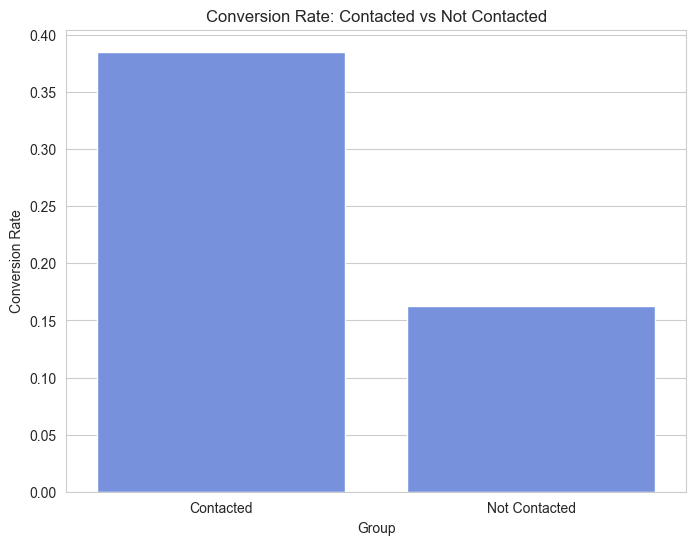

In [ ]:
# hypothesis 3: Prospects who have been in touch with the company have higher conversion rate
plt.figure(figsize=(12, 6))
contacted_conversion = df[(df['Do Not Call']==0) | ( df['Do Not Email']==0)]
not_contacted_conversion = df[(df['Do Not Call']==1 ) | (df['Do Not Email']==1)]

contacted_conversion_rate = contacted_conversion["Converted"].mean()
not_contacted_conversion_rate = not_contacted_conversion["Converted"].mean()

conversion_data = {
    "Group": ["Contacted", "Not Contacted"],
    "Conversion Rate": [contacted_conversion_rate, not_contacted_conversion_rate]
}

conversion_df = pd.DataFrame(conversion_data)

plt.figure(figsize=(8, 6))
sns.barplot(x="Group", y="Conversion Rate", data=conversion_df)
plt.title("Conversion Rate: Contacted vs Not Contacted")
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.show()

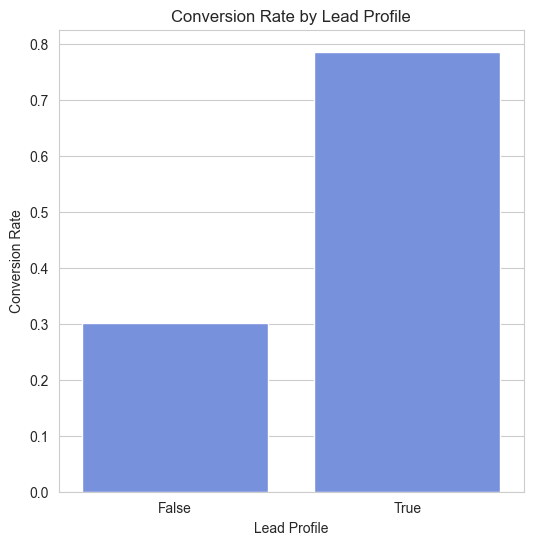

In [ ]:
# hypo 4:potential leads has higher conversion rate
plt.figure(figsize=(6, 6))
df['Leads'] = df['Lead Profile']=='Potential Lead'
sns.barplot(x=df.groupby("Leads")["Converted"].mean().index, 
            y=df.groupby("Leads")["Converted"].mean().values)
plt.title("Conversion Rate by Lead Profile")
plt.ylabel("Conversion Rate")
plt.xlabel("Lead Profile")
plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_25964\4101144940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


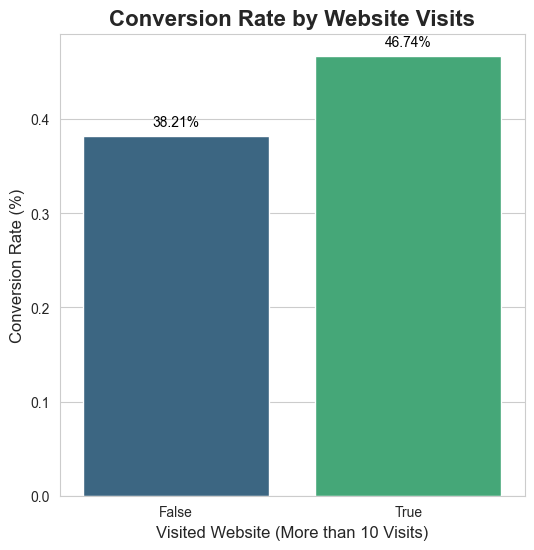

In [ ]:
# hypo 5: users who have visited the website have higher conversion rate
plt.figure(figsize=(6, 6))  

df['Visited Website'] = df['TotalVisits'] > 10

conversion_rates = df.groupby("Visited Website")["Converted"].mean()

sns.barplot(
    x=conversion_rates.index.astype(str),  
    y=conversion_rates.values,
    palette="viridis"  # Use a visually appealing color palette
)

# Add titles and labels with better formatting
plt.title("Conversion Rate by Website Visits", fontsize=16, fontweight='bold')
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.xlabel("Visited Website (More than 10 Visits)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, value in enumerate(conversion_rates.values):
    plt.text(i, value + 0.01, f"{value:.2%}", ha='center', fontsize=10, color='black')

plt.show()

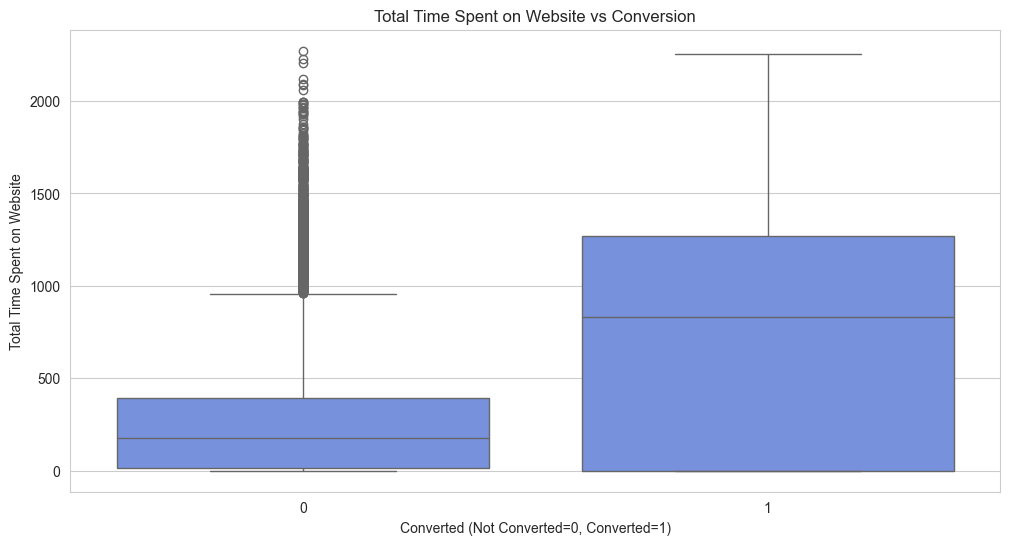

In [ ]:
# Hypothesis6 :Porspects who have spent more time on the website have higher conversion rate
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Converted"], y=df["Total Time Spent on Website"])
plt.title("Total Time Spent on Website vs Conversion")
plt.xlabel("Converted (Not Converted=0, Converted=1)")
plt.ylabel("Total Time Spent on Website")
plt.show()

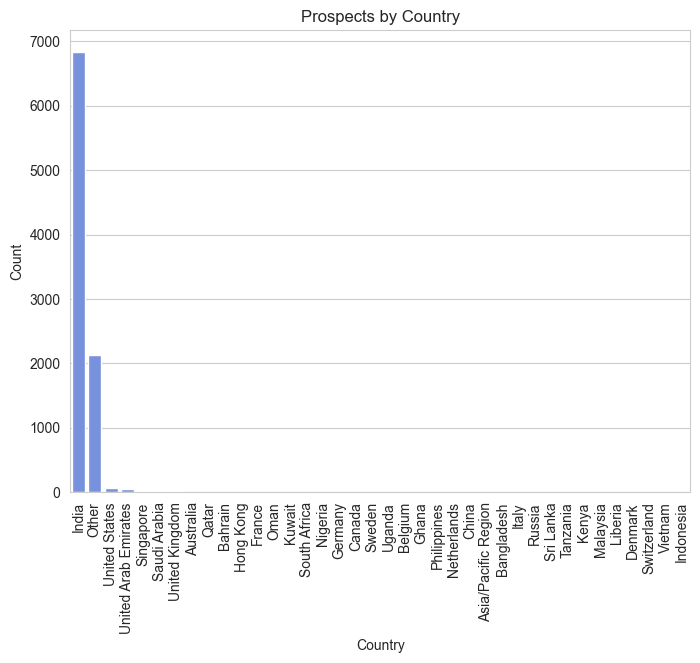

In [ ]:
# hypo 7 :Most of our prospects are from India
plt.figure(figsize=(8, 6))
sns.countplot(x="Country", data=df, order=df["Country"].value_counts().index)
plt.title("Prospects by Country")
plt.ylabel("Count")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_25964\2034190853.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_conversion = df.groupby("Asymmetrique Activity Index")["Converted"].mean().reset_index()
C:\Users\varsh\AppData\Local\Temp\ipykernel_25964\2034190853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Asymmetrique Activity Index",


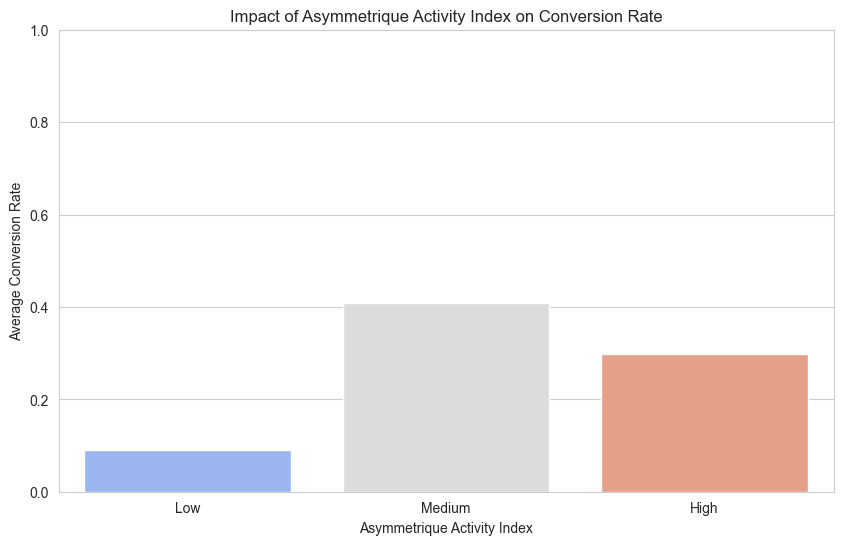

In [ ]:
# hypo 8 :Prospects who have high , medium Activity index have higher conversion rate

plt.figure(figsize=(10, 6))
df["Asymmetrique Activity Index"] = pd.Categorical(df["Asymmetrique Activity Index"], 
                                                   categories=["Low", "Medium", "High"], 
                                                   ordered=True)
activity_conversion = df.groupby("Asymmetrique Activity Index")["Converted"].mean().reset_index()
sns.barplot(x="Asymmetrique Activity Index", 
            y="Converted", 
            data=activity_conversion, 
            order=["Low", "Medium", "High"], 
            palette="coolwarm")
plt.title("Impact of Asymmetrique Activity Index on Conversion Rate")
plt.ylabel("Average Conversion Rate")
plt.xlabel("Asymmetrique Activity Index")
plt.ylim(0, 1)  
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_25964\3836747023.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile_conversion = df.groupby("Asymmetrique Profile Index")["Converted"].mean().reset_index()
C:\Users\varsh\AppData\Local\Temp\ipykernel_25964\3836747023.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Asymmetrique Profile Index",


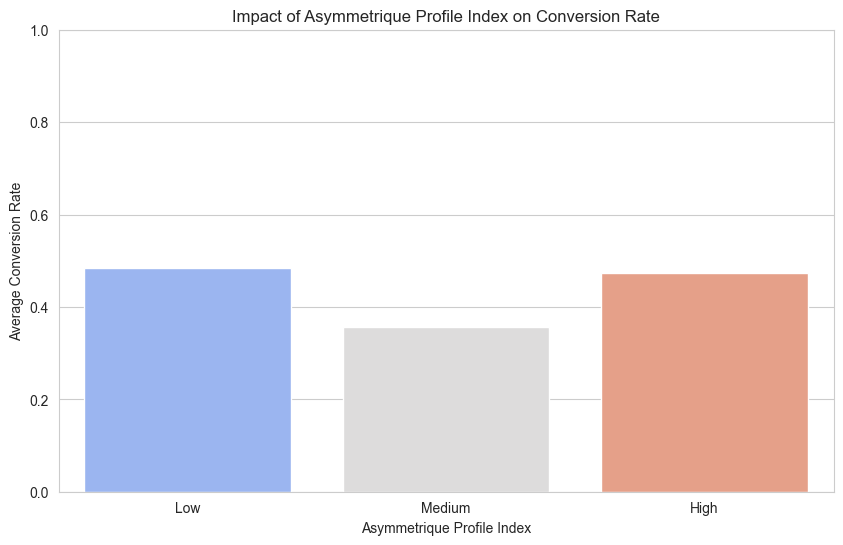

In [58]:
# hypo 9 :Prospects who have high , medium Profile index have higher conversion rate

plt.figure(figsize=(10, 6))
df["Asymmetrique Profile Index"] = pd.Categorical(df["Asymmetrique Profile Index"], 
                                                   categories=["Low", "Medium", "High"], 
                                                   ordered=True)
profile_conversion = df.groupby("Asymmetrique Profile Index")["Converted"].mean().reset_index()
sns.barplot(x="Asymmetrique Profile Index", 
            y="Converted", 
            data=profile_conversion, 
            order=["Low", "Medium", "High"],  
            palette="coolwarm")
plt.title("Impact of Asymmetrique Profile Index on Conversion Rate")
plt.ylabel("Average Conversion Rate")
plt.xlabel("Asymmetrique Profile Index")
plt.ylim(0, 1)  
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

<Figure size 1400x800 with 0 Axes>

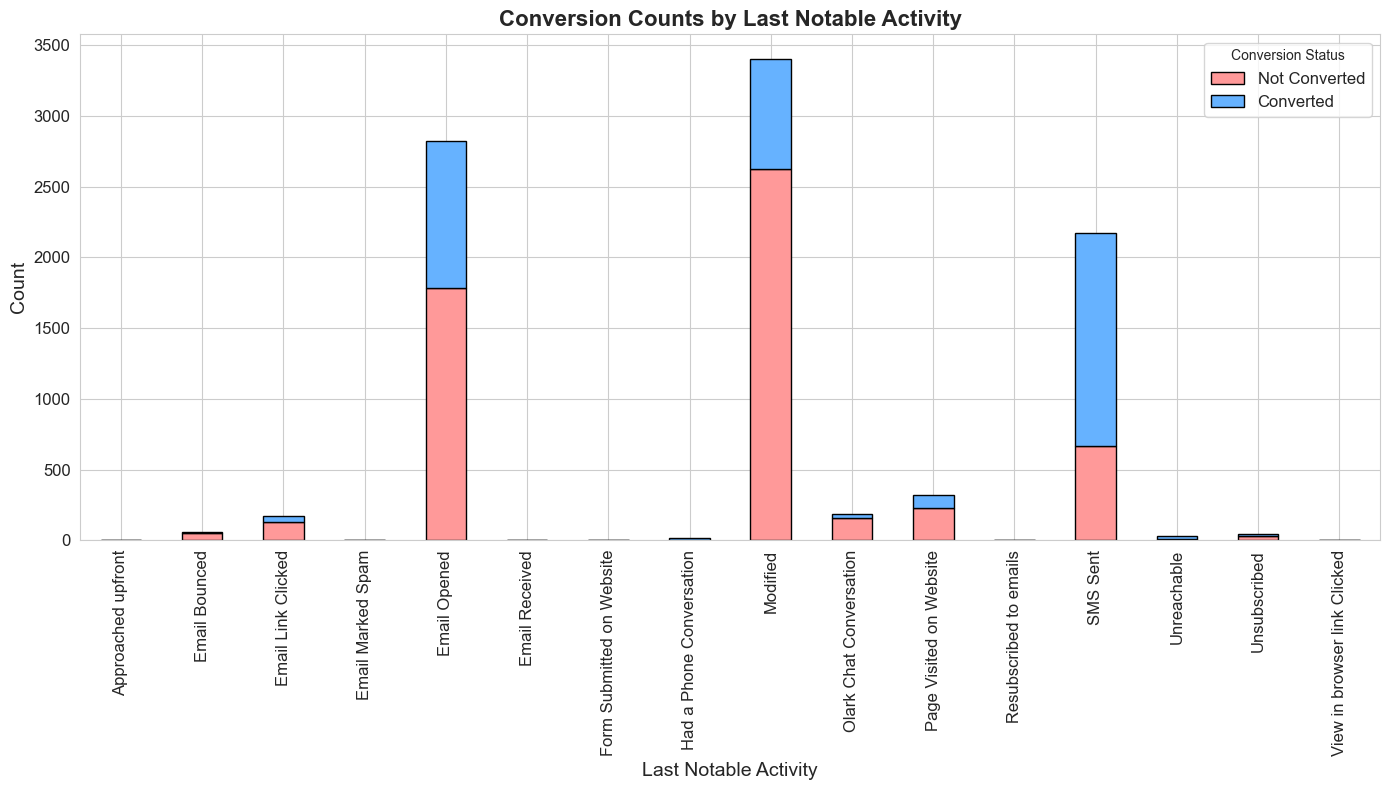

In [ ]:
# hypo 10:Prospects who sent sms and who resubscribed to email  have higher conversion rate
plt.figure(figsize=(14, 8))

# Group by "Last Notable Activity" and "Converted" to get counts
activity_conversion_counts = df.groupby(["Last Notable Activity", "Converted"]).size().unstack(fill_value=0)

# Plot a stacked bar chart
activity_conversion_counts.plot(
    kind="bar", 
    stacked=True, 
    figsize=(14, 8), 
    color=["#FF9999", "#66B2FF"],  # Custom colors for not converted and converted
    edgecolor="black"
)

# Add labels and title
plt.title("Conversion Counts by Last Notable Activity", fontsize=16, fontweight="bold")
plt.xlabel("Last Notable Activity", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Not Converted", "Converted"], fontsize=12, title="Conversion Status")

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()